In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
big_mart_train=pd.read_csv('C:\\Users\\Farnaz javan pour\\Desktop\\dataset\\big_mart\\train_big_mart.csv')
big_mart_train.head(5)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [3]:
big_mart_test=pd.read_csv('C:\\Users\\Farnaz javan pour\\Desktop\\dataset\\big_mart\\test_big_mart.csv')
big_mart_test.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [4]:
big_mart_train['Item_Fat_Content'].unique()

array(['Low Fat', 'Regular', 'low fat', 'LF', 'reg'], dtype=object)

In [5]:
big_mart_train['Item_Fat_Content'].replace(['low fat', 'LF', 'reg'],['Low Fat','Low Fat','Regular'],inplace=True)

In [6]:
big_mart_test['Item_Fat_Content'].unique()

array(['Low Fat', 'reg', 'Regular', 'LF', 'low fat'], dtype=object)

In [7]:
big_mart_test['Item_Fat_Content'].replace(['low fat', 'LF', 'reg'],['Low Fat','Low Fat','Regular'],inplace=True)

In [8]:
big_mart_train['num_year']=big_mart_train['Outlet_Establishment_Year'].apply(lambda x :2020-x)
big_mart_test['num_year']=big_mart_test['Outlet_Establishment_Year'].apply(lambda x:2020-x)

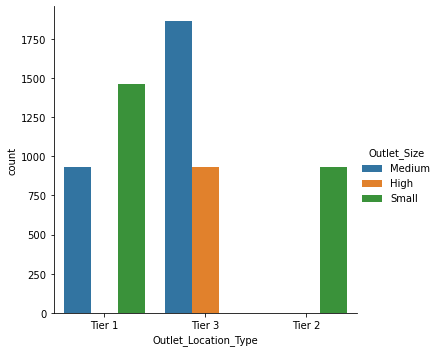

In [9]:
sns.catplot('Outlet_Location_Type',data=big_mart_train,hue='Outlet_Size',kind='count')

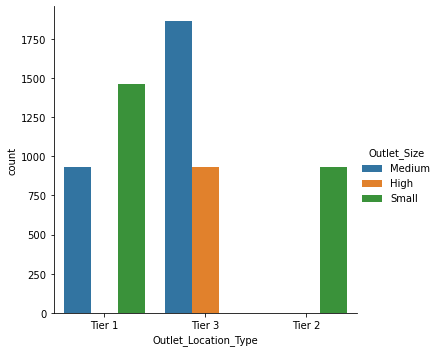

In [10]:
sns.catplot('Outlet_Location_Type',data=big_mart_train,hue='Outlet_Size',kind='count')

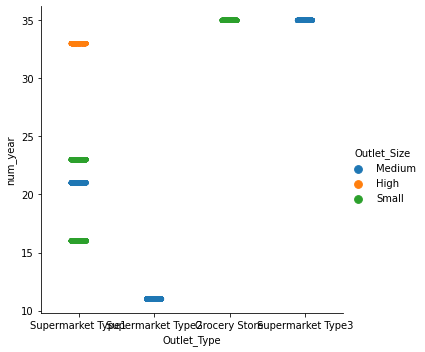

In [11]:
sns.catplot('Outlet_Type','num_year',data=big_mart_train,hue='Outlet_Size')

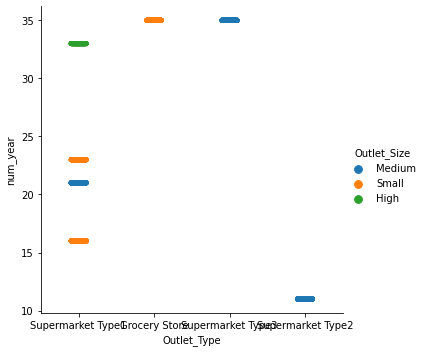

In [12]:
sns.catplot('Outlet_Type','num_year',data=big_mart_test,hue='Outlet_Size')

In [13]:
full_big_mart_data=[big_mart_train,big_mart_test]

In [14]:
big_mart_train.apply(lambda x: sum(x.isnull()))

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
num_year                        0
dtype: int64

In [15]:
big_mart_test.apply(lambda x :sum(x.isnull()))

Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
num_year                        0
dtype: int64

In [16]:
for data in full_big_mart_data:
     data['Item_Weight'].fillna(data['Item_Weight'].mean(),inplace=True)
     data['Outlet_Size'].fillna('Medium',inplace=True)

In [17]:
cols=['Item_Fat_Content','Item_Type','Outlet_Size','Outlet_Location_Type','Outlet_Type']

In [18]:
train_data=pd.get_dummies(big_mart_train,columns=cols,drop_first=True)


In [19]:
test_data=pd.get_dummies(big_mart_test,columns=cols,drop_first=True)

In [20]:
big_mart_train['Item_Type'].unique()

array(['Dairy', 'Soft Drinks', 'Meat', 'Fruits and Vegetables',
       'Household', 'Baking Goods', 'Snack Foods', 'Frozen Foods',
       'Breakfast', 'Health and Hygiene', 'Hard Drinks', 'Canned',
       'Breads', 'Starchy Foods', 'Others', 'Seafood'], dtype=object)

In [21]:
feat_cols = ['Item_Weight', 'Item_Visibility', 'Item_MRP', 'num_year',
       'Item_Fat_Content_Regular', 'Item_Type_Breads', 'Item_Type_Breakfast',
       'Item_Type_Canned', 'Item_Type_Dairy', 'Item_Type_Frozen Foods',
       'Item_Type_Fruits and Vegetables', 'Item_Type_Hard Drinks',
       'Item_Type_Health and Hygiene', 'Item_Type_Household', 'Item_Type_Meat',
       'Item_Type_Others', 'Item_Type_Seafood', 'Item_Type_Snack Foods',
       'Item_Type_Soft Drinks', 'Item_Type_Starchy Foods',
       'Outlet_Size_Medium', 'Outlet_Size_Small',
       'Outlet_Location_Type_Tier 2', 'Outlet_Location_Type_Tier 3',
       'Outlet_Type_Supermarket Type1', 'Outlet_Type_Supermarket Type2',
       'Outlet_Type_Supermarket Type3']

In [30]:
X = train_data[feat_cols]
y = train_data['Item_Outlet_Sales']

In [31]:
from sklearn.model_selection import train_test_split

In [32]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2,random_state = 0)

In [33]:
from xgboost.sklearn import XGBRegressor
XGB = XGBRegressor()
XGB.fit(X_train, y_train)


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=4, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [34]:
y_pred=XGB.predict(X_test)

In [35]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse=sqrt(mean_squared_error(y_test,y_pred))

In [36]:
rmse

1199.8410346504536

In [37]:
x_t=test_data[feat_cols]
y_result=XGB.predict(x_t)
y_result

array([1747.2274 , 1265.3572 ,  202.73059, ..., 1714.7622 , 5602.5938 ,
       1564.9109 ], dtype=float32)